In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  


In [2]:
TTable_Obs=pd.read_excel('China2020_2021\Data2022\ThreeYearmonthdata\TTable_2.xlsx')
TTable_Obs_T=TTable_Obs.T
TTable_Obs_T=TTable_Obs_T.drop([3],axis=1)
TTable_Obs_T=TTable_Obs_T.rename(columns={4:3})
TTable_Obs_T=TTable_Obs_T.rename(columns={0:'T',1:'G',2:'C',3:'R'})

TTable=pd.read_excel('China2020_2021\Data2022\ThreeYearmonthdata\TTable_3.xlsx')
TTable_T=TTable.T
TTable_T=TTable_T.drop([3],axis=1)
TTable_T=TTable_T.rename(columns={4:3})
TTable_T=TTable_T.rename(columns={0:'T',1:'G',2:'C',3:'R'})

In [3]:
array_Obs = TTable_Obs_T.values
Y_Obs=array_Obs[:9,3]

In [4]:
array = TTable_T.values

In [5]:
X = array[9:,0:3]
Y = array[9:,3]

In [6]:
from sklearn import svm
svr_poly = SVR(kernel="poly")

In [7]:
Y_result=[]
for i in range(9):
    model=svr_poly.fit(X,Y)
    X_pre=array[8-i:9-i,0:3]
    Y_pre = model.predict(X_pre)
    Y_result.insert(0,Y_pre)
    X=np.insert(X,0,X_pre.flatten())
    X=np.reshape(X,(int(X.size/3),3))
    Y=np.insert(Y,0,Y_Obs[8-i])
    print(i)
    

0
1
2
3
4
5
6
7
8


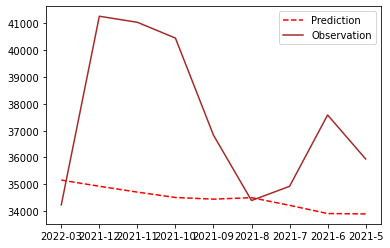

In [8]:
Date=[ '2022-03', '2021-12','2021-11',
       '2021-10', '2021-09',
       '2021-8','2021-7','2021-6','2021-5']

plt.plot(Date,Y_result,'r--',label="Prediction")
plt.plot(Date,Y_Obs,'brown',label="Observation")
plt.legend()

In [9]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_Obs,Y_result))
print('Mean Squared Error:', metrics.mean_squared_error(Y_Obs,Y_result))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_Obs,Y_result)))

Mean Absolute Error: 3164.0127273352628
Mean Squared Error: 15610068.605439149
Root Mean Squared Error: 3950.957935164477
